In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/STATS402_Project/"

In [ ]:
from sklearn.datasets import load_files
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler 


In [ ]:
train_data = pd.read_csv(path+'new_merged.csv')

In [ ]:
train_data

,Unnamed: 0,Unnamed: 0.1,id,Fulltext,text,img,label,clean text
0,0,0,42953,its their character not their color that matte...,its their character not their color that matters,img/42953.png,0,its their character not their color that matte...
1,1,1,23058,don't be afraid to love again everyone is not ...,don't be afraid to love again everyone is not ...,img/23058.png,0,dont be afraid to love again everyone is not l...
2,2,2,13894,"putting bows on your pet [[], ['Korat', 'Russ...",putting bows on your pet,img/13894.png,0,"putting bows on your pet, Korat, Russian Blue,..."
3,3,3,37408,i love everything and everybody! except for sq...,i love everything and everybody! except for sq...,img/37408.png,0,i love everything and everybody! except for sq...
4,4,4,82403,"everybody loves chocolate chip cookies, even h...","everybody loves chocolate chip cookies, even h...",img/82403.png,0,"everybody loves chocolate chip cookies, even h..."
...,...,...,...,...,...,...,...,...
12135,12135,13335,71352,fighting for gay rights Woman Woman Woman Girl...,fighting for gay rights,img/71352.png,0,fighting for gay rights Female Female Female F...
12136,12136,13336,2164,that feeling when you finish your homework in ...,that feeling when you finish your homework in ...,img/02164.png,0,that feeling when you finish your homework in ...
12137,12137,13337,3587,the day that shook new york city [['9/11 Memo...,the day that shook new york city,img/03587.png,0,the day that shook new york city9/11 Memorial ...
12138,12138,13338,47839,one of the first prototypes of the atom bomb ...,one of the first prototypes of the atom bomb,img/47839.png,0,one of the first prototypes of the atom bomb


In [ ]:
text = []
for i in train_data['text']:
  text.append(i)

In [ ]:
tf_transfomer = TfidfVectorizer(stop_words='english',decode_error='ignore')
X_train_counts_tf = tf_transfomer.fit_transform(text)
scaler = StandardScaler(with_mean=False)
x_train_counts_tf = scaler.fit_transform(X_train_counts_tf)

In [ ]:
X_train_counts_tf.shape

(12140, 21192)

In [ ]:
train_cut = 8000

In [ ]:
import numpy as np

In [ ]:
num_folds = 10
seed = 7
scoring = 'accuracy'
param_grid = {}
param_grid['C'] = [0.1,0.2,0.3,0.5,0.8,1,5,13,15]
param_grid['solver'] = ['newton-cg','lbfgs','liblinear','sag','saga']
model = LogisticRegression(max_iter = 10000)
kfold = KFold(n_splits=num_folds,random_state=seed,shuffle = True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=X_train_counts_tf,y=train_data['label'])
print('Best : %s Using %s' % (grid_result.best_score_, grid_result.best_params_))
param_grid = {}
param_grid['alpha'] = [0.001,0.01,0.05,0.1,0.5,1,1.5,2]
model = MultinomialNB()
kfold = KFold(n_splits=num_folds,random_state=seed,shuffle = True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=X_train_counts_tf[:train_cut],y=train_data['label'])
print('Best : %s Using %s' % (grid_result.best_score_, grid_result.best_params_))
param_grid = {}
param_grid['n_estimators'] = [10,50,100,150,200]
param_grid['max_features'] = ['auto','sqrt','log2']
param_grid['max_depth'] = [3,4,5,6,7,8,9,10]
model = RandomForestClassifier()
kfold = KFold(n_splits=num_folds,random_state=seed,shuffle = True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=X_train_counts_tf[:train_cut],y=train_data['label'])
print('Best : %s Using %s' % (grid_result.best_score_, grid_result.best_params_))
#SVM
param_grid = {'C':[0.1,0.2,0.3,0.5,0.8,1,5,13,15,20]}
model = SVC(max_iter =100000)
kfold = KFold(n_splits=num_folds,random_state=seed,shuffle = True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=X_train_counts_tf,y=train_data['label'])
print('Best : %s Using %s' % (grid_result.best_score_, grid_result.best_params_))
#KNN
param_grid = {}
param_grid['n_neighbors'] = [3,5,10,20,30]
param_grid['weights'] = ['uniform','distance']
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds,random_state=seed,shuffle = True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=X_train_counts_tf[:train_cut],y=train_data['label'])
print('Best : %s Using %s' % (grid_result.best_score_, grid_result.best_params_))

Best : 0.6698517298187808 Using {'C': 15}


In [ ]:
from sklearn.metrics import roc_curve, auc 

In [ ]:
models = {}
models['LR'] = LogisticRegression(C=5,solver= 'saga') 
models['SVM'] = SVC(C=0.8) 
models['CART'] = RandomForestClassifier(max_depth=9,max_features='sqrt',n_estimators=10) 
models['MNB'] = MultinomialNB(alpha=1) 
models['KNN'] = KNeighborsClassifier(n_neighbors=30,weights='uniform') 

In [ ]:
import matplotlib.pyplot as plt
##Logistic Regression
LR_model = LogisticRegression(C=5,solver = 'saga')
LR_y_score = LR_model.fit(X_train_counts_tf[:train_cut],train_data['label'][:train_cut]).decision_function(X_train_counts_tf[train_cut:])
LR_predictions = LR_model.predict(X_train_counts_tf[train_cut:])
lr_fpr,lr_tpr,lr_threshold = roc_curve(train_data['label'][train_cut:], LR_predictions) 
lr_roc_auc = auc(lr_fpr,lr_tpr) 
print('Accuracy for %s is %s' % ('Logistic Regression',accuracy_score(train_data['label'][train_cut:], LR_predictions)))
print(lr_roc_auc)

##SVM
SVM_model = SVC(C=1)
SVM_y_score = SVM_model.fit(X_train_counts_tf[:train_cut],train_data['label']).decision_function(X_train_counts_tf[train_cut:])
SVM_predictions = SVM_model.predict(X_train_counts_tf[train_cut:])
svm_fpr,svm_tpr,svm_threshold = roc_curve(train_data['label'][train_cut:], SVM_y_score)
svm_roc_auc = auc(svm_fpr,svm_tpr) 
print('Accuracy for %s is %s' % ('SVM',accuracy_score(train_data['label'][train_cut:], SVM_predictions)))


##Random Forest
RF_model = RandomForestClassifier(max_depth=9,max_features='sqrt',n_estimators=10) 
RF_y_score = RF_model.fit(X_train_counts_tf[:train_cut],train_data['label']).predict_proba(X_train_counts_tf[train_cut:])
RF_predictions = RF_model.predict(X_train_counts_tf[train_cut:])
rf_fpr,rf_tpr,rf_threshold = roc_curve(train_data['label'][train_cut:], RF_y_score[:, 1]) 
rf_roc_auc = auc(svm_fpr,svm_tpr) 
print('Accuracy for %s is %s' % ('Random Forest',accuracy_score(train_data['label'][train_cut:], RF_predictions)))

##Naive Bayes
NB_model = MultinomialNB(alpha=1)
NB_y_score = NB_model.fit(X_train_counts_tf[:train_cut],train_data['label']).predict_proba(X_train_counts_tf[train_cut:])
NB_predictions = NB_model.predict(X_train_counts_tf[train_cut:])
nb_fpr,nb_tpr,nb_threshold = roc_curve(train_data['label'][train_cut:], NB_y_score[:, 1])
nb_roc_auc = auc(nb_fpr,nb_tpr) 
print('Accuracy for %s is %s' % ('Naive Bayes',accuracy_score(train_data['label'][train_cut:], NB_predictions)))

##KNN
KNN_model = KNeighborsClassifier(n_neighbors=30,weights='uniform')
KNN_y_score = KNN_model.fit(X_train_counts_tf[:train_cut],train_data['label']).predict_proba(X_train_counts_tf[train_cut:])
KNN_predictions = KNN_model.predict(X_train_counts_tf[train_cut:])
knn_fpr,knn_tpr,knn_threshold = roc_curve(train_data['label'][train_cut:], KNN_y_score[:, 1]) 
knn_roc_auc = auc(svm_fpr,svm_tpr) 
print('Accuracy for %s is %s' % ('KNN',accuracy_score(train_data['label'][train_cut:], KNN_predictions)))


Accuracy for Logistic Regression is 0.6265700483091787
0.5855146000885743


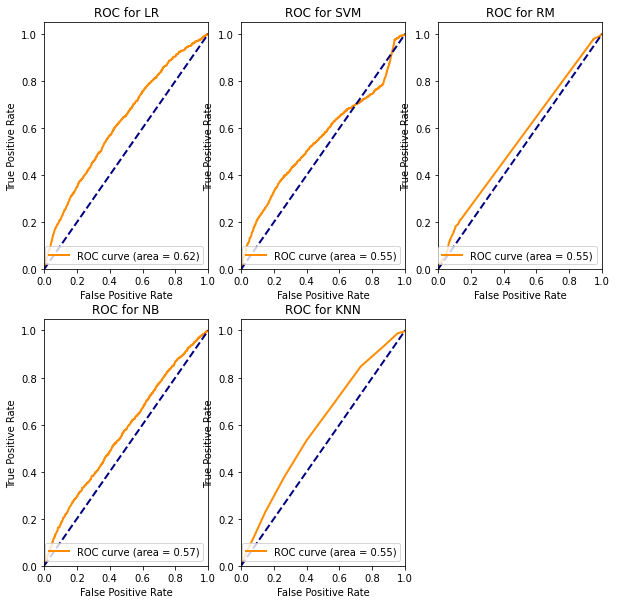

In [ ]:
lw = 2
fig=plt.figure(figsize=(10,10))

ax1=fig.add_subplot(231)
ax1.plot(lr_fpr, lr_tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % lr_roc_auc) 
ax1.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for LR')
plt.legend(loc="lower right")


ax2=fig.add_subplot(232)
ax2.plot(svm_fpr, svm_tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % svm_roc_auc) 
ax2.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for SVM')
plt.legend(loc="lower right")


ax3=fig.add_subplot(233)
ax3.plot(rf_fpr, rf_tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % rf_roc_auc) 
ax3.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for RM')
plt.legend(loc="lower right")


ax4=fig.add_subplot(234)
ax4.plot(nb_fpr, nb_tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % nb_roc_auc) 
ax4.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for NB')
plt.legend(loc="lower right")


ax5=fig.add_subplot(235)
ax5.plot(knn_fpr, knn_tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % knn_roc_auc) 
ax5.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for KNN')
plt.legend(loc="lower right")
plt.savefig('TF_IDF_ROC.jpg')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
LR_matrix = confusion_matrix(train_data['label'][train_cut:], LR_predictions)
print(LR_matrix)
precision = str(226/(131+226))
print('Precision is ' + precision)
recall = str(226/(226+1014))
print('Recall is ' + recall)

[[1629  131]
 [1014  226]]
Precision is 0.6330532212885154
Recall is 0.18225806451612903


In [ ]:
SVM_matrix = confusion_matrix(train_data['label'][train_cut:], SVM_predictions)
print(SVM_matrix)
precision = str(209/(130+209))
print('Precision is ' + precision)
recall = str(209/(209+1031))
print('Recall is ' + recall)

[[1630  130]
 [1031  209]]
Precision is 0.616519174041298
Recall is 0.1685483870967742


In [ ]:
RF_matrix = confusion_matrix(train_data['label'][train_cut:], RF_predictions)
print(RF_matrix)
precision = str(2/(2+0))
print('Precision is ' + precision)
recall = str(2/(2+1238))
print('Recall is ' + recall)

[[1760    0]
 [1238    2]]
Precision is 1.0
Recall is 0.0016129032258064516


In [ ]:
NB_matrix = confusion_matrix(train_data['label'][train_cut:], NB_predictions)
print(NB_matrix)
precision = str(164/(123+164))
print('Precision is ' + precision)
recall = str(164/(164+1076))
print('Recall is ' + recall)

[[1637  123]
 [1076  164]]
Precision is 0.5714285714285714
Recall is 0.13225806451612904


In [ ]:
KNN_matrix = confusion_matrix(train_data['label'][train_cut:], KNN_predictions)
print(KNN_matrix)
precision = str(4/(4+3))
print('Precision is ' + precision)
recall = str(4/(4+1236))
print('Recall is ' + recall)

[[1757    3]
 [1236    4]]
Precision is 0.5714285714285714
Recall is 0.0032258064516129032


In [ ]:
7634/(7634+4506)

0.6288303130148271

In [ ]:
#define a funcation that could draw confusion matrix
def plot_confusion_matrix(cm, labels_name, title):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]   
    plt.imshow(cm, interpolation='nearest')   
    plt.title(title)    
    plt.colorbar()
    num_local = np.array(range(len(labels_name)))    
    plt.xticks(num_local, labels_name, rotation=90)    
    plt.yticks(num_local, labels_name)    
    plt.ylabel('True label')    
    plt.xlabel('Predicted label')

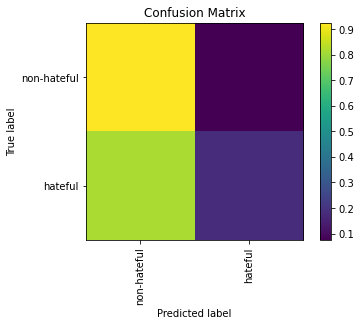

In [ ]:
#draw the confusion matrix plot
plot_confusion_matrix(LR_matrix, ['non-hateful','hateful'], "Confusion Matrix")
# plt.savefig('/HAR_cm.png', format='png')
plt.show()

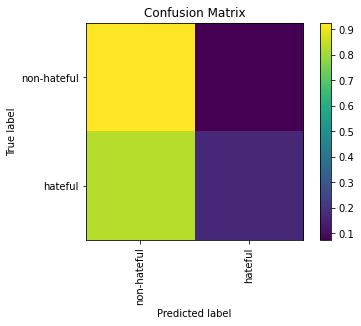

In [ ]:
#draw the confusion matrix plot
plot_confusion_matrix(SVM_matrix, ['non-hateful','hateful'], "Confusion Matrix")
# plt.savefig('/HAR_cm.png', format='png')
plt.show()

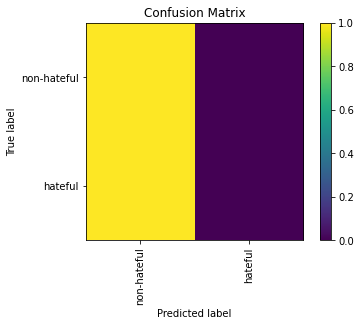

In [ ]:
#draw the confusion matrix plot
plot_confusion_matrix(RF_matrix, ['non-hateful','hateful'], "Confusion Matrix")
# plt.savefig('/HAR_cm.png', format='png')
plt.show()

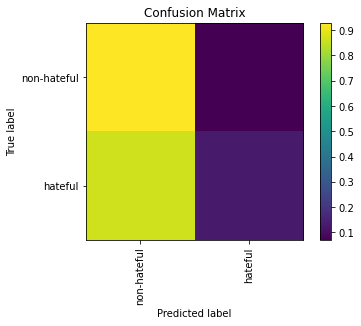

In [ ]:
#draw the confusion matrix plot
plot_confusion_matrix(NB_matrix, ['non-hateful','hateful'], "Confusion Matrix")
# plt.savefig('/HAR_cm.png', format='png')
plt.show()

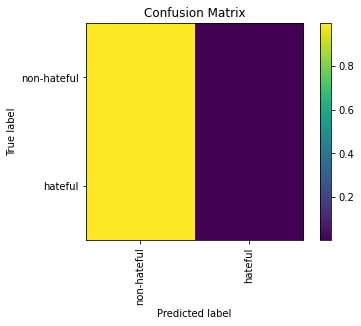

In [ ]:
#draw the confusion matrix plot
plot_confusion_matrix(KNN_matrix, ['non-hateful','hateful'], "Confusion Matrix")
# plt.savefig('/HAR_cm.png', format='png')
plt.show()